Data Understanding and Cleaning:

● Load the dataset provided. Perform initial data exploration by answering the
following:

  o How many rows and columns are there in the dataset?

  o Identify missing values in each column.

● Perform appropriate data cleaning and pre-processing, including:

  o Handling missing values (if applicable).

  o Encoding categorical variables.

  o Scaling numerical features (if necessary)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML/ML Project/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [6]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [7]:
df = pd.get_dummies(df, columns=['Department', 'EducationField'], prefix=['Dept', 'Edu'])

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['JobRole'] = encoder.fit_transform(df['JobRole'])

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler2 = MinMaxScaler()
scaler = StandardScaler()
df[['Age', 'MonthlyIncome']] = scaler.fit_transform(df[['Age', 'MonthlyIncome']])
df[['YearsAtCompany', 'TotalWorkingYears']] = scaler.fit_transform(df[['YearsAtCompany', 'TotalWorkingYears']])

2. Exploratory Data Analysis (EDA)

● Visualize the relationships between attrition and key variables, such as:

o Age, Job Satisfaction, Monthly Income, Years at Company.

● Identify trends and patterns using:

o Bar plots, box plots, and histograms.

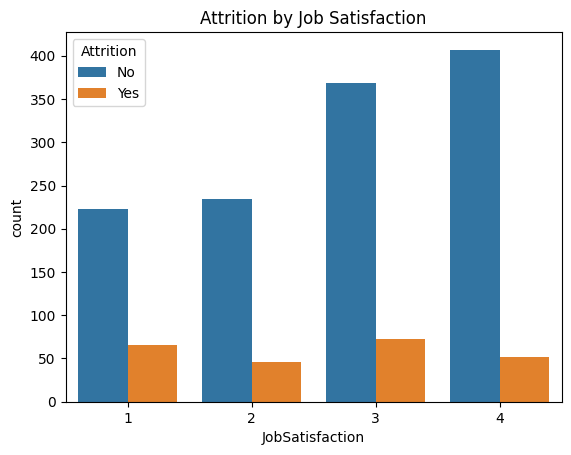

In [11]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

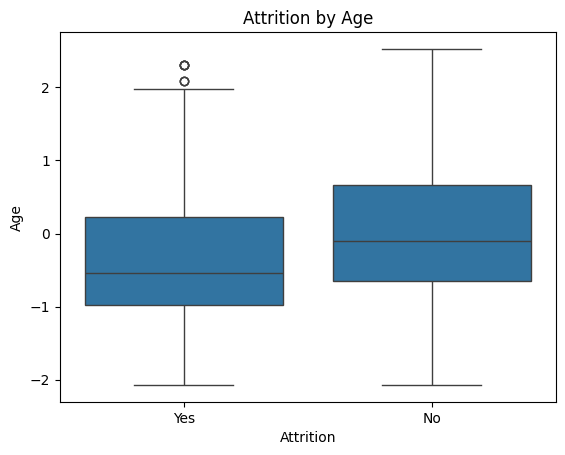

In [12]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition by Age')
plt.show()

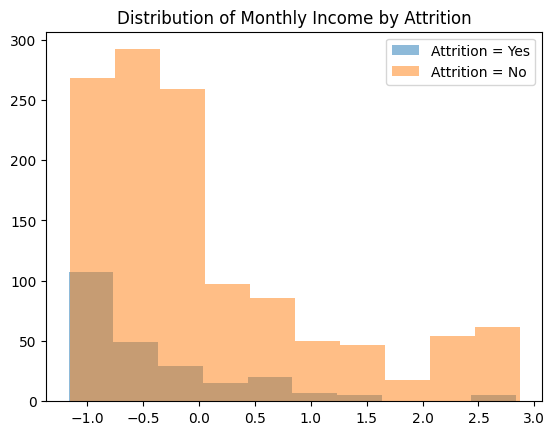

In [13]:
plt.hist(df[df['Attrition'] == 'Yes']['MonthlyIncome'], alpha=0.5, label='Attrition = Yes')
plt.hist(df[df['Attrition'] == 'No']['MonthlyIncome'], alpha=0.5, label='Attrition = No')
plt.title('Distribution of Monthly Income by Attrition')
plt.legend()
plt.show()

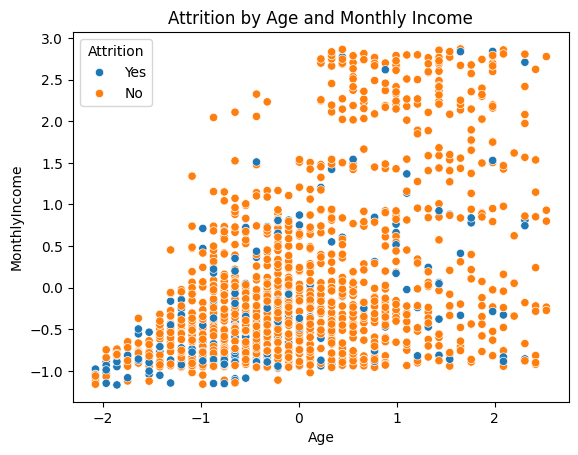

In [14]:
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Attrition by Age and Monthly Income')
plt.show()

3. Model Building

● Train a classification model to predict attrition using appropriate algorithms (e.g.,
Logistic Regression, Decision Trees, or Random Forest).

● Split the data into training and testing sets (e.g., 80% train, 20% test).

● Evaluate the model using performance metrics such as:

o Accuracy, precision, recall, and F1-score.

In [15]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'PercentSalaryHike', 'TotalWorkingYears',]]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8401360544217688
Precision: 0.25
Recall: 0.10256410256410256
F1-score: 0.14545454545454545


Insights and Recommendations

● Based on your analysis, provide actionable insights into the factors that influence
attrition.

● Suggest recommendations for reducing attrition.

#### Insights
From Exploratory Data Analysis:

* Bar Plots: If you observe differences in attrition rates across different categories of feature Job Satisfaction indicates that this feature is likely a big factor in Attrition.

* Box plots: People who are youngest and older tends to have more attrition rate.

* Histograms: Shows monthly income might also be a factor.There is notcable shifts in the shape of histogram between low and high monthly income.

* Scatter plots: From this also we figures low monthly income employees tends to have more attrition rate.


#### Recommedation for Reducing Attrition

1. Improve Job Satisfaction:

* Conduct surveys to understand employee needs and concerns.

* Provide opportunities for career development and growth.

* Offer competitive compensation and benefits packages.

2. Address Compensation and Tenure:

* Ensure salaries are competitive within the industry and location.

* Offer retention bonuses or other incentives to long-term employees.

* Provide clear career paths and opportunities for advancement.

3. Age-Related Considerations:

* Offer flexible work arrangements to accommodate employees with families or other commitments.

* Develop mentorship programs to connect employees across generations.

* Provide opportunities for employees of all ages to learn and grow.